In [1]:
import requests
from bs4 import BeautifulSoup
myBaseUrl = "https://www.amazon.com/Sammons-Preston-Dysphagia-Controlled-Dishwasher/product-reviews/B0754J8CNJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber="
# for different product change this base url, should end with page number = 
start_urls = []
for i in range(1, 2): # for different product change second number in range to number of review pages + 1
    start_urls.append(myBaseUrl + str(i))

HEADERS = {
    'authority': 'www.amazon.com',
'method' : 'GET',
'path' : '/rd/uedata?ld&v=0.215337.0&id=63S62AF5VNJJ4NDF32HD&sw=1536&sh=864&vw=779&vh=738&m=1&sc=63S62AF5VNJJ4NDF32HD&ue=1&bb=100&ns=106&ne=203&af=217&cf=247&be=302&fp=120&fcp=120&pc=735&tc=-183&na_=-183&ul_=-55&_ul=-54&rd_=-1612361183497&_rd=-1612361183497&fe_=-181&lk_=-181&_lk=-181&co_=-181&_co=-181&sc_=-1612361183497&rq_=-175&rs_=-95&_rs=87&dl_=-46&di_=312&de_=313&_de=313&_dc=735&ld_=735&_ld=-1612361183497&ntd=0&ty=1&rc=0&hob=1&hoe=2&ld=735&t=1612361184232&ctb=1&rt=cf:13-1-0-4-2-13-1_af:13-1-0-4-2-13-1_ld:30-7-0-9-4-22-0&csmtags=aui|aui:aui_build_date:3.20.8-2021-01-27|ewc:unpersist|ewc:unpersist:emptycart|ewc:bview|ewc|ewc:prime|ewc:cartsize:0|ewc:aui|navbar|fls-na-amazon-com|adblk_no|csm-feature-touch-enabled:false|adRender:CustomerReviews:right-ad-1:Product|adRender:d5a09d1b-62af-4f33-a96a-d339a8e84d93|adRender:CustomerReviews:right-ad-1:Product:creativeid:16983469601|adRender:d5a09d1b-62af-4f33-a96a-d339a8e84d93:creativeid:16983469601|adRender:CustomerReviews:right-ad-1:Product:programid:1002|adRender:d5a09d1b-62af-4f33-a96a-d339a8e84d93:programid:1002|adRender:CustomerReviews:right-ad-1:Product:creativetemplatename:image|adRender:d5a09d1b-62af-4f33-a96a-d339a8e84d93:creativetemplatename:image|iss-on-time&viz=visible:1&pty=CustomerReviews&spty=remoteProduct&pti=B0754J8CNJ&tid=HPZXB0930WXTM9QYEJQV&aftb=1&ui=2',
'scheme' : 'https',
'accept':'*/*',
'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36'
    
}
response = []
for i in start_urls:
    response.append(requests.get(i,headers=HEADERS))

In [2]:
print(response) #response 200 means success

[<Response [200]>]


In [3]:
#collects soup data
soups = []
for i in response:
    soups.append(BeautifulSoup(i.content))
    
#collects and cleans review data
reviews = []
for soup in soups:
    review = soup.findAll("span",{'class':"a-size-base review-text review-text-content"})
    for i in review:
        reviews.append(i.text)
strippedreviews = []
for review in reviews:
    strippedreviews.append(review.strip())

In [4]:
finalstars = []
for soup in soups:
    star = soup.findAll(attrs = {'data-hook':"review-star-rating"})
    for i in star: 
        finalstars.append(i.text)

In [5]:
#collects and cleans title data 
titles = []
for soup in soups:
    title = soup.findAll("a",{'class':"a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold"})
    for i in title:
        titles.append(i.text)
strippedtitles = []
for title in titles:
    strippedtitles.append(title.strip())

In [6]:
#creates a csv file with title and review data 
import pandas as pd    

df = pd.DataFrame(strippedtitles, columns=["title"])   
df.to_csv('soupirije.csv', index=False)  #change name of csv file as needed 
read = pd.read_csv("soupirije.csv")
read["review"] = strippedreviews
read.to_csv("soupirije.csv", index=False)
read["star"] = finalstars
read.to_csv("soupirije.csv", index=False)
df = pd.read_csv("soupirije.csv")

In [7]:
#runs sentiment analysis on collected data in csv file
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['review'].apply(pol)
df['subjectivity'] = df['review'].apply(sub)
df

,title,review,star,polarity,subjectivity
0,Helped make it safer to drink.,We had to help my Aunt drink all liquids with ...,5.0 out of 5 stars,-0.031250,0.625000
1,Works as advertised,Wife has dysphagia problems and this device me...,5.0 out of 5 stars,0.300000,0.650000
2,Leaks!!!,This cup has a small hole on the bottom and it...,1.0 out of 5 stars,-0.416667,0.366667
3,Holds only a few ounces of liquid,This is only good for someone in terrible cond...,1.0 out of 5 stars,-0.165000,0.644000
4,Life changer!,It works wonderfully for my granddaughter who ...,5.0 out of 5 stars,0.625000,0.770000
5,One Star,Never could get it to work properly. Returned it.,1.0 out of 5 stars,0.000000,0.100000


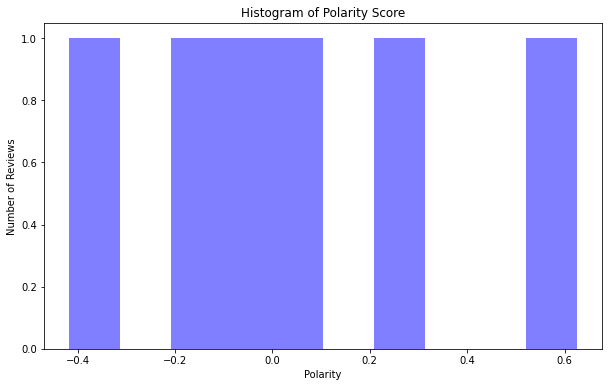

In [8]:
import matplotlib.pyplot as plt
num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [9]:
mean1 = df['polarity'].mean()
print("Mean of Polarity: ", mean1)
median1 = df['polarity'].median()
print("Median of Polarity: ", median1)

Mean of Polarity:  0.052013888888888894
Median of Polarity:  -0.015625


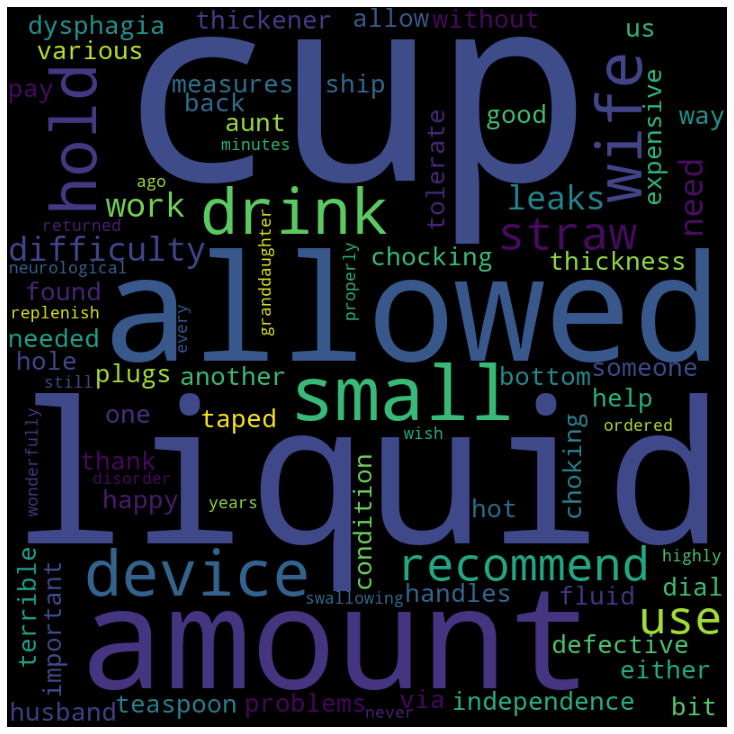

In [10]:

from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)
comment_words = ""
for i in df.review: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

c:\users\jaeme\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

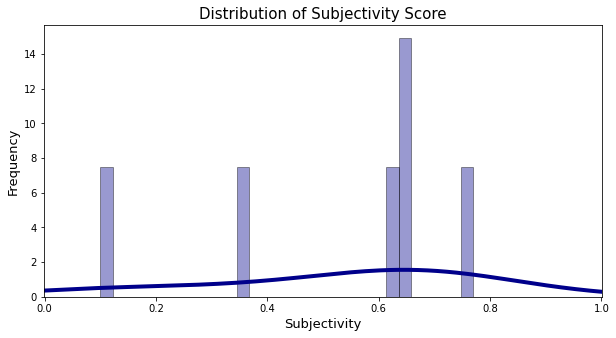

In [11]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)